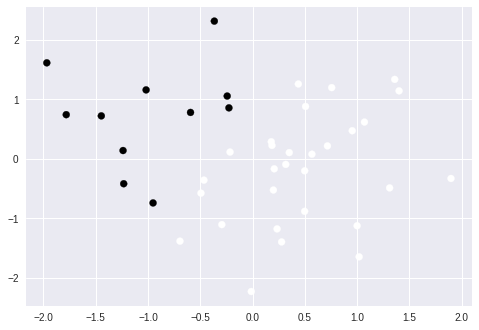

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(11090111)

n = 40
omega = np.random.randn(1,1)
noise = 0.8 * np.random.randn(1,1)
data_x = np.random.randn(n,2)
data_y = np.zeros(n)
for i,x in enumerate(data_x):
  data_y[i] = 2 * (omega * x[0] + x[1] + noise > 0) -1

plt.scatter(data_x.T[0],data_x.T[1],c=data_y.T)

In [0]:
X = np.zeros(2*n).reshape(n,2)
for i in range(0,n):
  X[i] = data_x[i] * data_y[i]
K = np.dot(X,X.T)

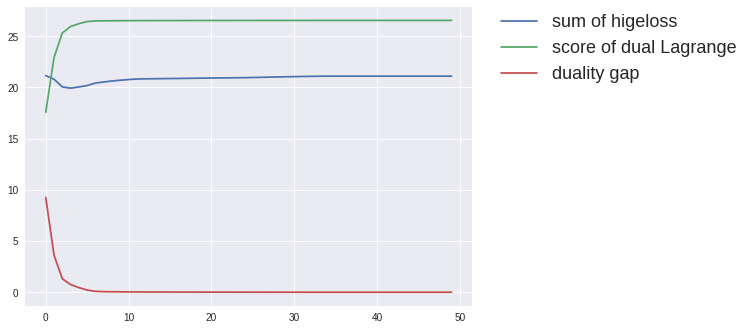

In [78]:
alpha = np.random.randn(n).reshape(n,1)
eta = 0.6
lda = 10
iterations = 50
np.random.seed(11090111)

def projection(at):
  for i,ati in enumerate(at):
    ati = min(ati,np.ones(1))
    ati = max(ati,np.zeros(1))
    at[i] = ati
  return at

def negativedual(at):
  return (np.dot(np.dot(at.T,K),at)/(4*lda) - np.sum(at))[0][0]

def sumofHingeLoss(at,w):
  score = 0
  for i in range(0,n):
    score += max(0,1-np.dot(w,X[i]))
  return score[0]

def dualitygap(at,i):
  w = np.dot(alpha.T,X) / (2 * lda)
  loss = sumofHingeLoss(at,w)
  reg = lda * np.dot(w,w.T)
  neg = -1 * negativedual(at)
  
  lossres[i] = loss
  negres[i] = neg
  gapres[i] = loss + reg - neg
  return

lossres = np.zeros(iterations)
negres = np.zeros(iterations)
gapres = np.zeros(iterations)

for i in range(0,iterations):
  alpha -= eta * (np.dot(K,alpha) / (2 * lda) - np.ones(n).reshape(n,1))
  alpha = projection(alpha)
  dualitygap(alpha,i)

plt.plot(range(0,iterations),lossres,label="sum of higeloss")
plt.plot(range(0,iterations),negres,label="score of dual Lagrange")
plt.plot(range(0,iterations),gapres,label="duality gap")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)